In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


pd.set_option("display.max_columns", None)

In [2]:
def get_rc(i, cols):
    r = i // cols + 1
    c = i % cols + 1

    return (r, c)


def get_rows_columns(df, c=5):
    COLUMNS = c
    d, m = divmod(df.shape[0], COLUMNS)
    ROWS = d + (1 if m > 0 else m)

    return ROWS, COLUMNS


def get_fig_subplots(df, ROWS, COLUMNS):
    fig = make_subplots(
        rows=ROWS,
        cols=COLUMNS,
        subplot_titles=df.index.values,
        specs=[[{"type": "polar"} for _ in range(COLUMNS)] for _ in range(ROWS)],
    )

    return fig


def get_min_max_value(df, columns):
    min_value = df[columns].unstack().min()
    max_value = df[columns].unstack().max()

    return min_value, max_value


def get_theta_list(df, name, origin_columns, columns):
    return [
        f"{col} - {round(value, ndigits=2)}"
        for col, value in zip(origin_columns, df.loc[name, origin_columns].values)
    ]

In [3]:
# SCALER = StandardScaler
SCALER = MinMaxScaler
# SCALER = MaxAbsScaler

In [4]:
teams_stats = pd.read_csv("./csv/stats/teams.csv", index_col="Team")
print(teams_stats.shape)
teams_stats.head()

(10, 12)


,Games,Win,Loss,WinRate,KD,CKPM,GameDuration,WinGameDuration,LossGameDuration,GPM,GDPM,KPM
Team,,,,,,,,,,,,
DRX,9.0,1.0,8.0,0.111111,0.393333,0.793313,29.529630,34.450000,28.914583,1571.253978,-406.147199,0.197370
Dplus KIA,10.0,7.0,3.0,0.700000,1.823529,0.616273,31.126667,30.061905,33.611111,1879.293051,215.803165,0.407735
Gen.G,10.0,8.0,2.0,0.800000,1.385542,0.698427,28.206667,28.493750,27.058333,1912.877817,203.649029,0.407395
Hanwha Life Esports,10.0,6.0,4.0,0.600000,1.464789,0.572555,31.270000,33.177778,28.408333,1800.189333,61.911603,0.346820
KT Rolster,10.0,7.0,3.0,0.700000,1.519481,0.721106,27.576667,27.688095,27.316667,1896.948825,139.544007,0.448257


In [5]:
scaler = SCALER()
origin_columns = ["KD", "CKPM", "KPM", "GPM", "GDPM"]
columns = ["_" + col for col in origin_columns]
teams_stats[columns] = scaler.fit_transform(teams_stats[origin_columns])
teams_stats.head()

,Games,Win,Loss,WinRate,KD,CKPM,GameDuration,WinGameDuration,LossGameDuration,GPM,GDPM,KPM,_KD,_CKPM,_KPM,_GPM,_GDPM
Team,,,,,,,,,,,,,,,,,
DRX,9.0,1.0,8.0,0.111111,0.393333,0.793313,29.529630,34.450000,28.914583,1571.253978,-406.147199,0.197370,0.000000,1.000000,0.084810,0.000000,0.000000
Dplus KIA,10.0,7.0,3.0,0.700000,1.823529,0.616273,31.126667,30.061905,33.611111,1879.293051,215.803165,0.407735,1.000000,0.450132,0.852181,0.901691,0.982257
Gen.G,10.0,8.0,2.0,0.800000,1.385542,0.698427,28.206667,28.493750,27.058333,1912.877817,203.649029,0.407395,0.693757,0.705295,0.850944,1.000000,0.963062
Hanwha Life Esports,10.0,6.0,4.0,0.600000,1.464789,0.572555,31.270000,33.177778,28.408333,1800.189333,61.911603,0.346820,0.749167,0.314349,0.629976,0.670139,0.739213
KT Rolster,10.0,7.0,3.0,0.700000,1.519481,0.721106,27.576667,27.688095,27.316667,1896.948825,139.544007,0.448257,0.787408,0.775733,1.000000,0.953373,0.861820


C:\Users\pjm58\AppData\Local\Temp\ipykernel_58144\879664895.py:6: RuntimeWarning: divide by zero encountered in divide
  x = 100 / y


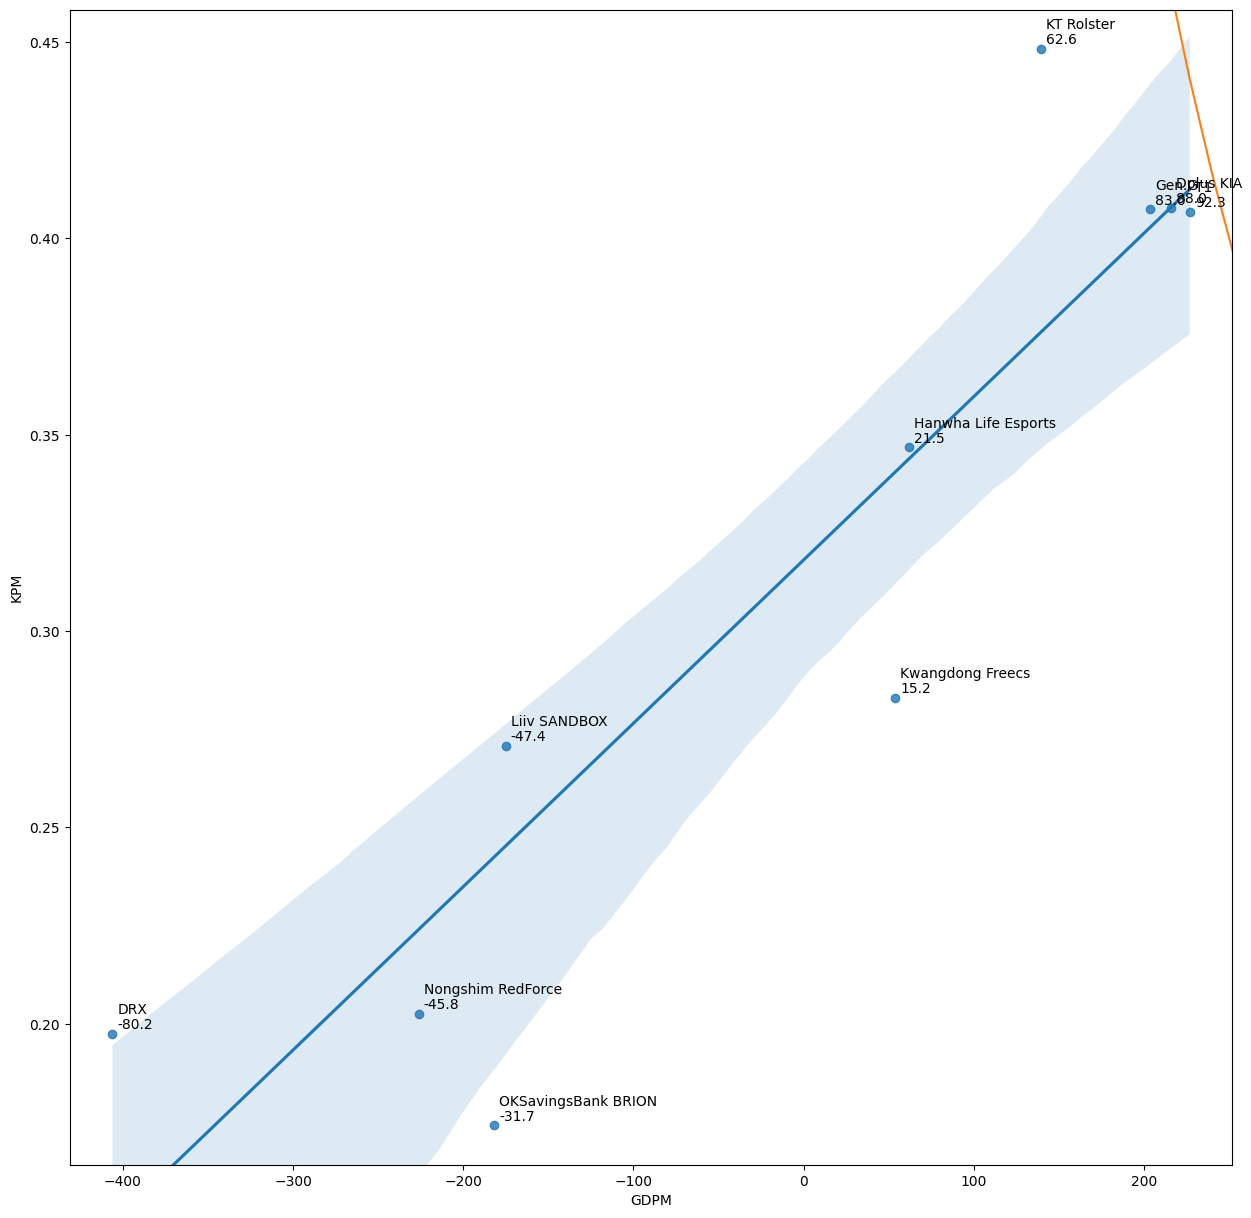

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.set_xlim(teams_stats["GDPM"].min() - 25, teams_stats["GDPM"].max() + 25)
ax.set_ylim(teams_stats["KPM"].min() - 0.01, teams_stats["KPM"].max() + 0.01)
ax = sns.regplot(data=teams_stats, x="GDPM", y="KPM")
y = np.linspace(0, 1.2)
x = 100 / y
sns.lineplot(x=x, y=y)
for idx, i in zip(teams_stats.index, range(teams_stats.shape[0])):
    row = teams_stats.iloc[i]
    plt.annotate(
        idx, xy=(row["GDPM"], row["KPM"]), xytext=(5, 20), textcoords="offset pixels"
    )
    plt.annotate(
        round(row["GDPM"] * row["KPM"], ndigits=1),
        xy=(row["GDPM"], row["KPM"]),
        xytext=(5, 5),
        textcoords="offset pixels",
    )

In [7]:
import plotly.io as pio

ROWS, COLUMNS = get_rows_columns(teams_stats)
min_value, max_value = get_min_max_value(teams_stats, columns)

fig = get_fig_subplots(teams_stats, ROWS, COLUMNS)
for i, team_name in enumerate(teams_stats.index):
    df = teams_stats.loc[team_name, columns]
    theta_list = get_theta_list(teams_stats, team_name, origin_columns, columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=df, theta=theta_list, fill="toself", name=team_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))
fig.show()

In [8]:
players_stats = pd.read_csv("./csv/stats/players_by_position.csv", index_col="Player")
players_stats.shape

(54, 19)

In [9]:
players_stats.columns

Index(['Position', 'Team', 'Games', 'Win', 'Loss', 'WinRate', 'Kills',
       'Deaths', 'Assists', 'KDA', 'DPM', 'CS', 'CSPM', 'Gold', 'GPM', 'KP',
       'KS', 'GS', 'ChampionsPlayed'],
      dtype='object')

In [10]:
players_stats.loc[players_stats['Position'] == 'Jungle', 'KS']

Player
Croco       0.200000
Juhan       1.000000
Canyon      0.177419
Peanut      0.226087
Clid        0.221154
Cuzz        0.153846
YoungJae    0.162500
Willer      0.164179
Sylvie      0.200000
UmTi        0.200000
Oner        0.188525
Name: KS, dtype: float64

In [11]:
origin_columns = ['KDA', 'KP', 'KS', 'DPM', 'CSPM', 'GPM', 'GS', 'ChampionsPlayed']
columns = ['_' + col for col in origin_columns]
positions = ["Top", "Jungle", "Mid", "Bot", "Support"]

In [12]:
for position in positions:
    scaler = SCALER()
    df = players_stats.loc[players_stats["Position"] == position]
    players_stats.loc[
        players_stats["Position"] == position, columns
    ] = scaler.fit_transform(df[origin_columns])

In [13]:
df = players_stats.loc[players_stats["Position"] == positions[0]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns, columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))
fig.show()

In [14]:
df = players_stats.loc[players_stats["Position"] == positions[1]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns, columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))
fig.show()

In [15]:
df = players_stats.loc[players_stats["Position"] == positions[2]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns, columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))
fig.show()

In [16]:
df = players_stats.loc[players_stats["Position"] == positions[3]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns, columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))
fig.show()

In [17]:
df = players_stats.loc[players_stats["Position"] == positions[4]]
min_value, max_value = get_min_max_value(df, columns)

ROWS, COLUMNS = get_rows_columns(df, 4)

fig = get_fig_subplots(df, ROWS, COLUMNS)
for i, player_name in enumerate(df.index):
    _df = df.loc[player_name, columns]
    theta_list = get_theta_list(df, player_name, origin_columns, columns)

    r, c = get_rc(i, COLUMNS)
    fig.add_trace(
        go.Scatterpolar(r=_df, theta=theta_list, fill="toself", name=player_name),
        row=r,
        col=c,
    )

fig.update_layout(
    height=400 * ROWS,
    showlegend=False,
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    title=dict(y=1),
)
fig.update_annotations(yshift=20)
fig.update_polars(radialaxis=dict(range=[min_value - 0.2, max_value + 0.2]))
fig.show()